# Rice Classification by Image

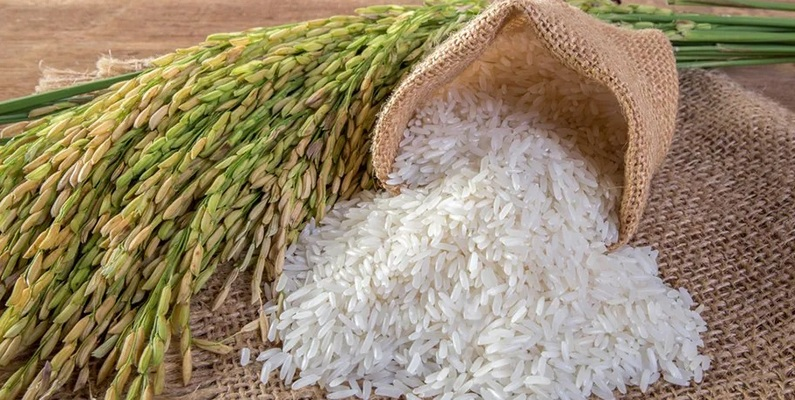

DATASET: https://www.muratkoklu.com/datasets/

Citation Request: See the articles for more detailed information on the data.

Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285. https://doi.org/10.1016/j.compag.2021.106285

Cinar, I., & Koklu, M. (2021). Determination of Effective and Specific Physical Features of Rice Varieties by Computer Vision In Exterior Quality Inspection. Selcuk Journal of Agriculture and Food Sciences, 35(3), 229-243. https://doi.org/10.15316/SJAFS.2021.252

Cinar, I., & Koklu, M. (2022). Identification of Rice Varieties Using Machine Learning Algorithms. Journal of Agricultural Sciences https://doi.org/10.15832/ankutbd.862482

Cinar, I., & Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194. https://doi.org/10.18201/ijisae.2019355381

DATASET: https://www.muratkoklu.com/datasets/


Highlights
• Arborio, Basmati, Ipsala, Jasmine and Karacadag rice varieties were used.

• The dataset (1) has 75K images including 15K pieces from each rice variety. The dataset (2) has 12 morphological, 4 shape and 90 color features.

• ANN, DNN and CNN models were used to classify rice varieties.

• Classified with an accuracy rate of 100% through the CNN model created.

• The models used achieved successful results in the classification of rice varieties.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from PIL import Image

from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [16]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = 'Rice_Image_Dataset/'
train_dataset = image_dataset_from_directory(directory,
                                             shuffle = True,
                                             image_size = IMG_SIZE,
                                             validation_split = 0.1,
                                             subset = 'training',
                                             seed = 42
                                            )
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle = True,
                                             image_size = IMG_SIZE,
                                             validation_split = 0.1,
                                             subset = 'validation',
                                             seed = 42
                                            )


Found 75000 files belonging to 5 classes.
Using 67500 files for training.
Found 75000 files belonging to 5 classes.
Using 7500 files for validation.


### Observations:
#### Dataset is quite large. Data Augmentation is not required. Data is already Black and White. Could be scaled in Gray Scale
#### Since dataset is large we can train it on the last 4 layers of MobileNetV2 isntead of last layer as an initial approach
#### Final Layer will be a softmax layer with 5 neurons

In [17]:
class_names = train_dataset.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


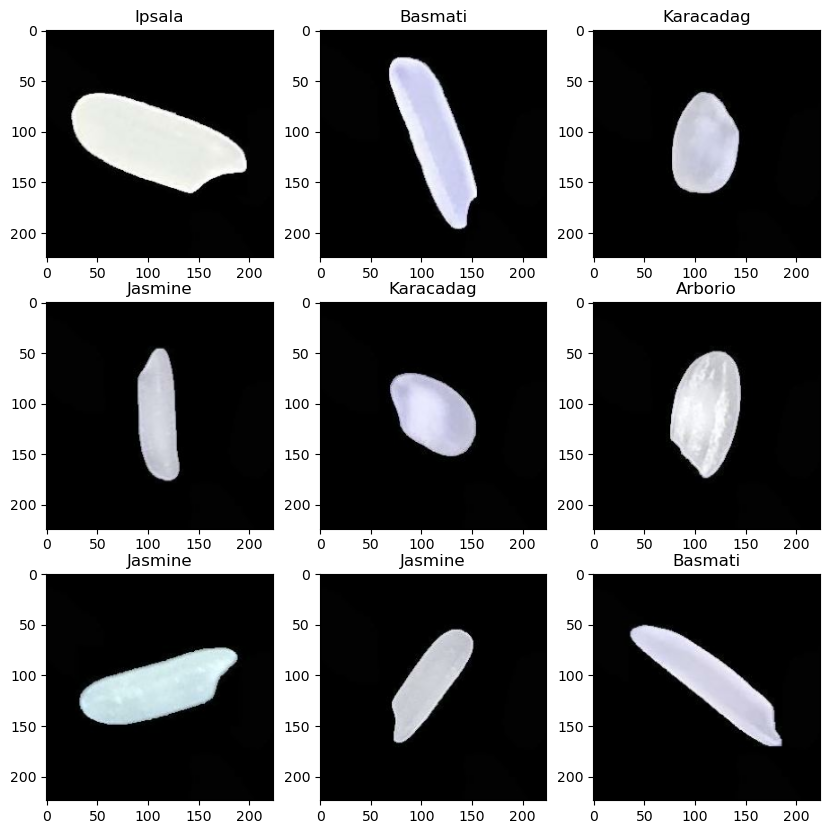

In [18]:
plt.figure(figsize = (10,10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        print(images[i].shape)
        plt.imshow(images[i]/255)
        plt.title(class_names[labels[i]])

Image shape = 224, 224, 3

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [20]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [21]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3),
                                              include_top = True,
                                              weights = 'imagenet')
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [22]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 6].name)
print(base_model.layers[nb_layers - 5].name)
print(base_model.layers[nb_layers - 4].name)
print(base_model.layers[nb_layers - 3].name)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

block_16_project_BN
Conv_1
Conv_1_bn
out_relu
global_average_pooling2d_3
predictions


In [31]:
def cnn_model(image_shape = IMG_SIZE):
    
    input_shape = IMG_SIZE + (3,)
    base_model = tf.keras.applications.MobileNetV2(input_shape,
                                                   include_top = False,
                                                   weights = 'imagenet'
                                                  )
    
    base_model.trainable = False
    
    #creating the input layer
    inputs = tf.keras.Input(shape = input_shape)
    x = preprocess_input(inputs)
    x = base_model(x, training = False)
    
    #Add the new classification layer
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(0.2)(x)
    outputs = tfl.Dense(5, activation='softmax')(x)
    
    #fit the model
    new_model = tf.keras.Model(inputs, outputs)
    
    return new_model
    
    

In [35]:
model = cnn_model(IMG_SIZE)

In [36]:
base_lr = 0.001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_lr),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
             )

In [37]:
initial_epochs = 2
history = model.fit(train_dataset,validation_data = validation_dataset, epochs = initial_epochs)

Epoch 1/2
2110/2110 [==============================] - 1583s 748ms/step - loss: 0.0948 - accuracy: 0.9704 - val_loss: 0.0417 - val_accuracy: 0.9869
Epoch 2/2
2110/2110 [==============================] - 1412s 669ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.0316 - val_accuracy: 0.9899


In [38]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_accuracy']

In [39]:
acc

[0.0, 0.970370352268219, 0.9855111241340637]

In [40]:
val_acc

[0.0, 0.9869333505630493, 0.9898666739463806]

In [41]:
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']